Load Basic Libraries

In [346]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import warnings
warnings.filterwarnings('ignore')

In [347]:
df_titanic=pd.read_csv('titanic.csv');
df_titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


#### EDA And Feature Engineering

In [348]:
df_titanic.shape

(891, 12)

<AxesSubplot:>

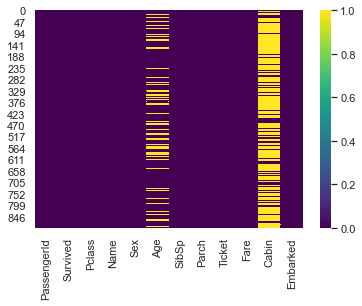

In [349]:
sns.heatmap(df_titanic.isnull(),cmap='viridis')

Shown Null Value Using Heatmap

In [350]:
df_titanic.isnull()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,False,False,False,False,False,False,False,False,False,False,True,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,True,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...
886,False,False,False,False,False,False,False,False,False,False,True,False
887,False,False,False,False,False,False,False,False,False,False,False,False
888,False,False,False,False,False,True,False,False,False,False,True,False
889,False,False,False,False,False,False,False,False,False,False,False,False


In [351]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

Age and Cabin have null value and it is also visible in heatmap plotting 

Percentage of missing null values

In [352]:
df_titanic.isnull().mean()

PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64

<AxesSubplot:xlabel='Survived', ylabel='count'>

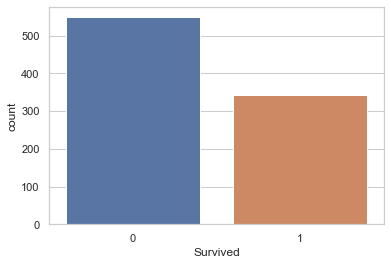

In [353]:
sns.set_style('whitegrid')
sns.countplot(df_titanic['Survived'])

With the help of count plot visualize survived and not survived Passengers

<AxesSubplot:xlabel='Survived', ylabel='count'>

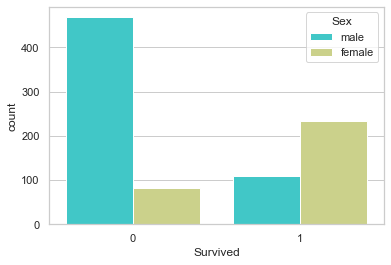

In [354]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=df_titanic,palette='rainbow')

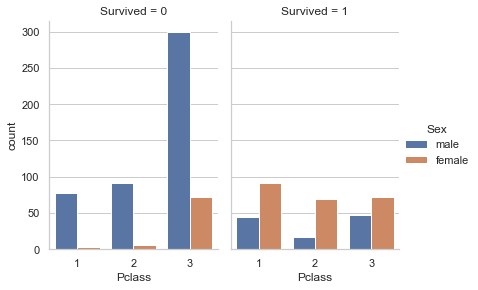

In [355]:
sns.catplot(x="Pclass", hue="Sex", col="Survived",
                data=df_titanic, kind="count",
                height=4, aspect=.7);

On the basis of male and female check the survived and not survied count shown in plot

<AxesSubplot:xlabel='Survived', ylabel='count'>

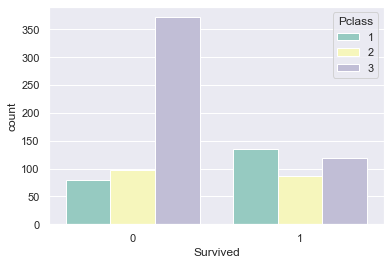

In [356]:
sns.set_theme(style="darkgrid")
sns.countplot(x='Survived',hue='Pclass',data=df_titanic,palette='Set3')

In [357]:
df_titanic.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [358]:
df_titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


#### Plot displot see the age column shape

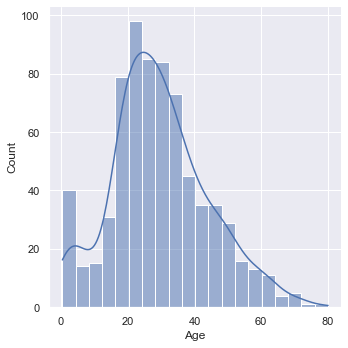

In [359]:
sns.displot(df_titanic['Age'],kde=True)

Shape of Plot is normal looking so apply mean to replace NaN Value because its not effect mean more

In [360]:
#find Mean of Age 
mean=df_titanic['Age'].mean()

In [361]:
#imputation of age in Dataset by using Mean
df_titanic['Age'].replace(np.NaN,df_titanic['Age'].mean(),inplace=True)

In [362]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [363]:
df_titanic['Age']

0      22.000000
1      38.000000
2      26.000000
3      35.000000
4      35.000000
         ...    
886    27.000000
887    19.000000
888    29.699118
889    26.000000
890    32.000000
Name: Age, Length: 891, dtype: float64

In [364]:
#Embarked column is in categorical form so it is better to use mode to replace NaN Value
#imputing Embarked column in datset by mode
df_titanic['Embarked'].replace(np.NaN,df_titanic['Embarked'].mode()[0],inplace=True)

In [365]:
df_titanic['Embarked']

0      S
1      C
2      S
3      S
4      S
      ..
886    S
887    S
888    S
889    C
890    Q
Name: Embarked, Length: 891, dtype: object

#### Check Null Value After Replacing NaN From dataset

In [366]:
df_titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         0
dtype: int64

In [367]:
# column Cabin is have more missing value and as per domain knowledge it is not effect the data if it will drop
# Name,Ticket column  is also not mandatory to keep they can be droped

df_titanic.drop(['Name','Ticket','Cabin'],axis=1,inplace=True)

See Data Set After Droping the few Column 

In [368]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.699118,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


#### columns sex and Embarked is in catagorical form so need to encode it in numeric form


#### use label encoder to convert the vale into numeric one

In [369]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df_titanic['Sex']=le.fit_transform(df_titanic['Sex'])
df_titanic['Embarked']=le.fit_transform(df_titanic['Embarked'])

See the Dataset After Encoding the Sex And Embarked Columns

<AxesSubplot:>

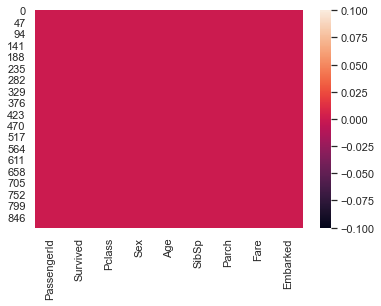

In [370]:
sns.heatmap(df_titanic.isnull())

Now All null Value has been Removed shown in plot 

In [371]:
df_titanic

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


#### check data type using dtype command 

In [372]:
df_titanic.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Sex              int32
Age            float64
SibSp            int64
Parch            int64
Fare           float64
Embarked         int32
dtype: object

#### Visualization

#### Univariate Analysis

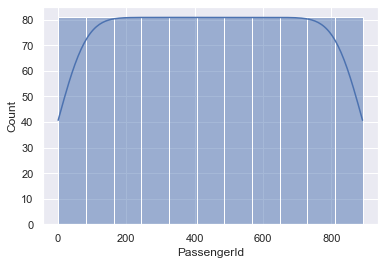

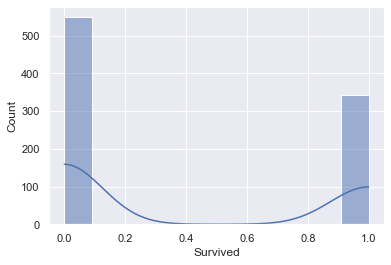

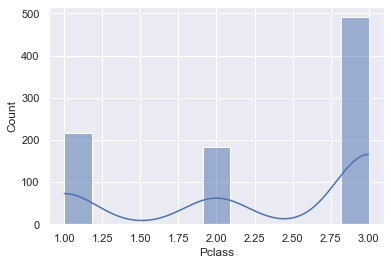

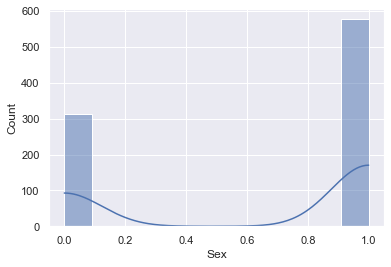

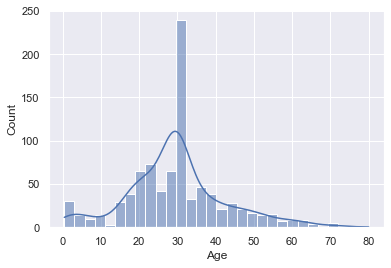

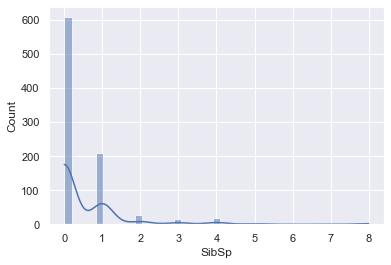

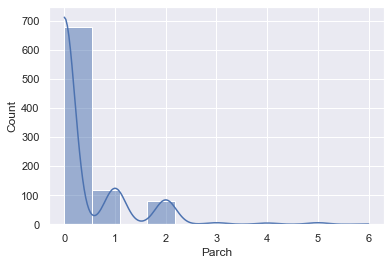

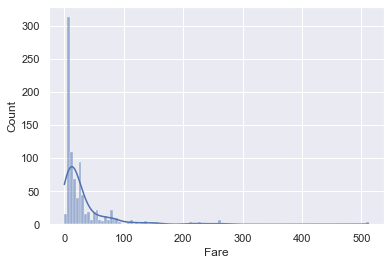

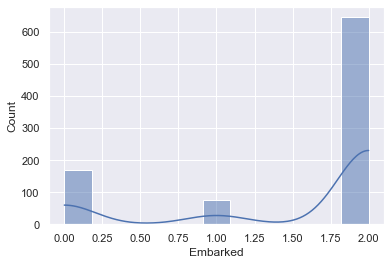

In [373]:
for data in df_titanic:
    sns.histplot(df_titanic[data],kde=True)
    plt.show()

#### check corelation 

In [374]:
cor=df_titanic.corr()

In [375]:
cor

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
PassengerId,1.000000,-0.005007,-0.035144,0.042939,0.033207,-0.057527,-0.001652,0.012658,0.013128
Survived,-0.005007,1.000000,-0.338481,-0.543351,-0.069809,-0.035322,0.081629,0.257307,-0.167675
Pclass,-0.035144,-0.338481,1.000000,0.131900,-0.331339,0.083081,0.018443,-0.549500,0.162098
Sex,0.042939,-0.543351,0.131900,1.000000,0.084153,-0.114631,-0.245489,-0.182333,0.108262
Age,0.033207,-0.069809,-0.331339,0.084153,1.000000,-0.232625,-0.179191,0.091566,-0.026749
SibSp,-0.057527,-0.035322,0.083081,-0.114631,-0.232625,1.000000,0.414838,0.159651,0.068230
Parch,-0.001652,0.081629,0.018443,-0.245489,-0.179191,0.414838,1.000000,0.216225,0.039798
Fare,0.012658,0.257307,-0.549500,-0.182333,0.091566,0.159651,0.216225,1.000000,-0.224719
Embarked,0.013128,-0.167675,0.162098,0.108262,-0.026749,0.068230,0.039798,-0.224719,1.000000


#### visualization of co relation

<AxesSubplot:>

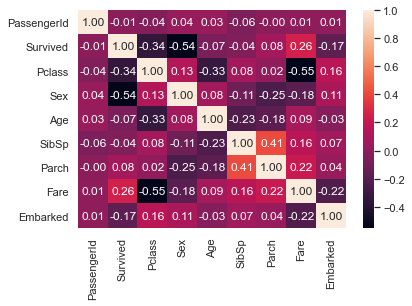

In [376]:
sns.heatmap(cor,annot=True,fmt='0.2f')

Fare feature seems to have correlation with survived feature. (0.26)

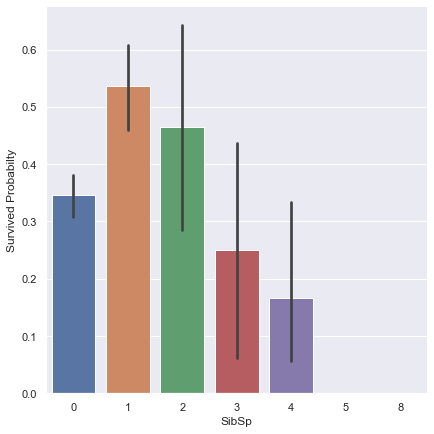

In [377]:
g = sns.factorplot(x="SibSp", y="Survived", data=df_titanic, kind="bar",size=6)
g.set_ylabels("Survived Probabilty")
plt.show()

0 ,1,2 have more survived rate than 3 and 4

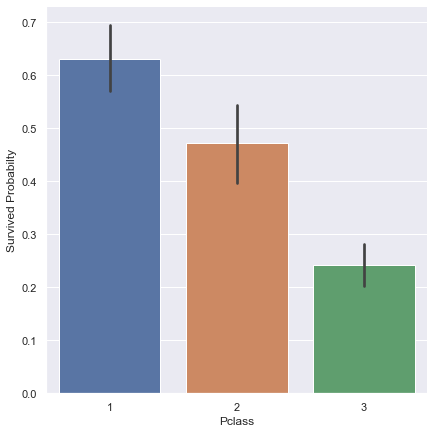

In [378]:
g = sns.factorplot(x="Pclass", y="Survived", data=df_titanic, kind="bar",size=6)
g.set_ylabels("Survived Probabilty")
plt.show()

#### class 1 have more chnace of survive 
#### class 3 have less chnace of survive

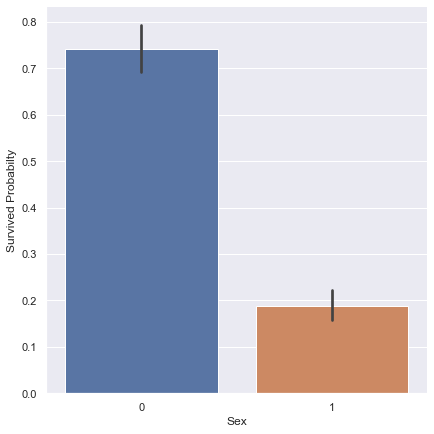

In [379]:
g = sns.factorplot(x="Sex", y="Survived", data=df_titanic, kind="bar",size=6)
g.set_ylabels("Survived Probabilty")
plt.show()

#### Here 1=Male and 0=female
#### Female survived rate is more in comparision to Male

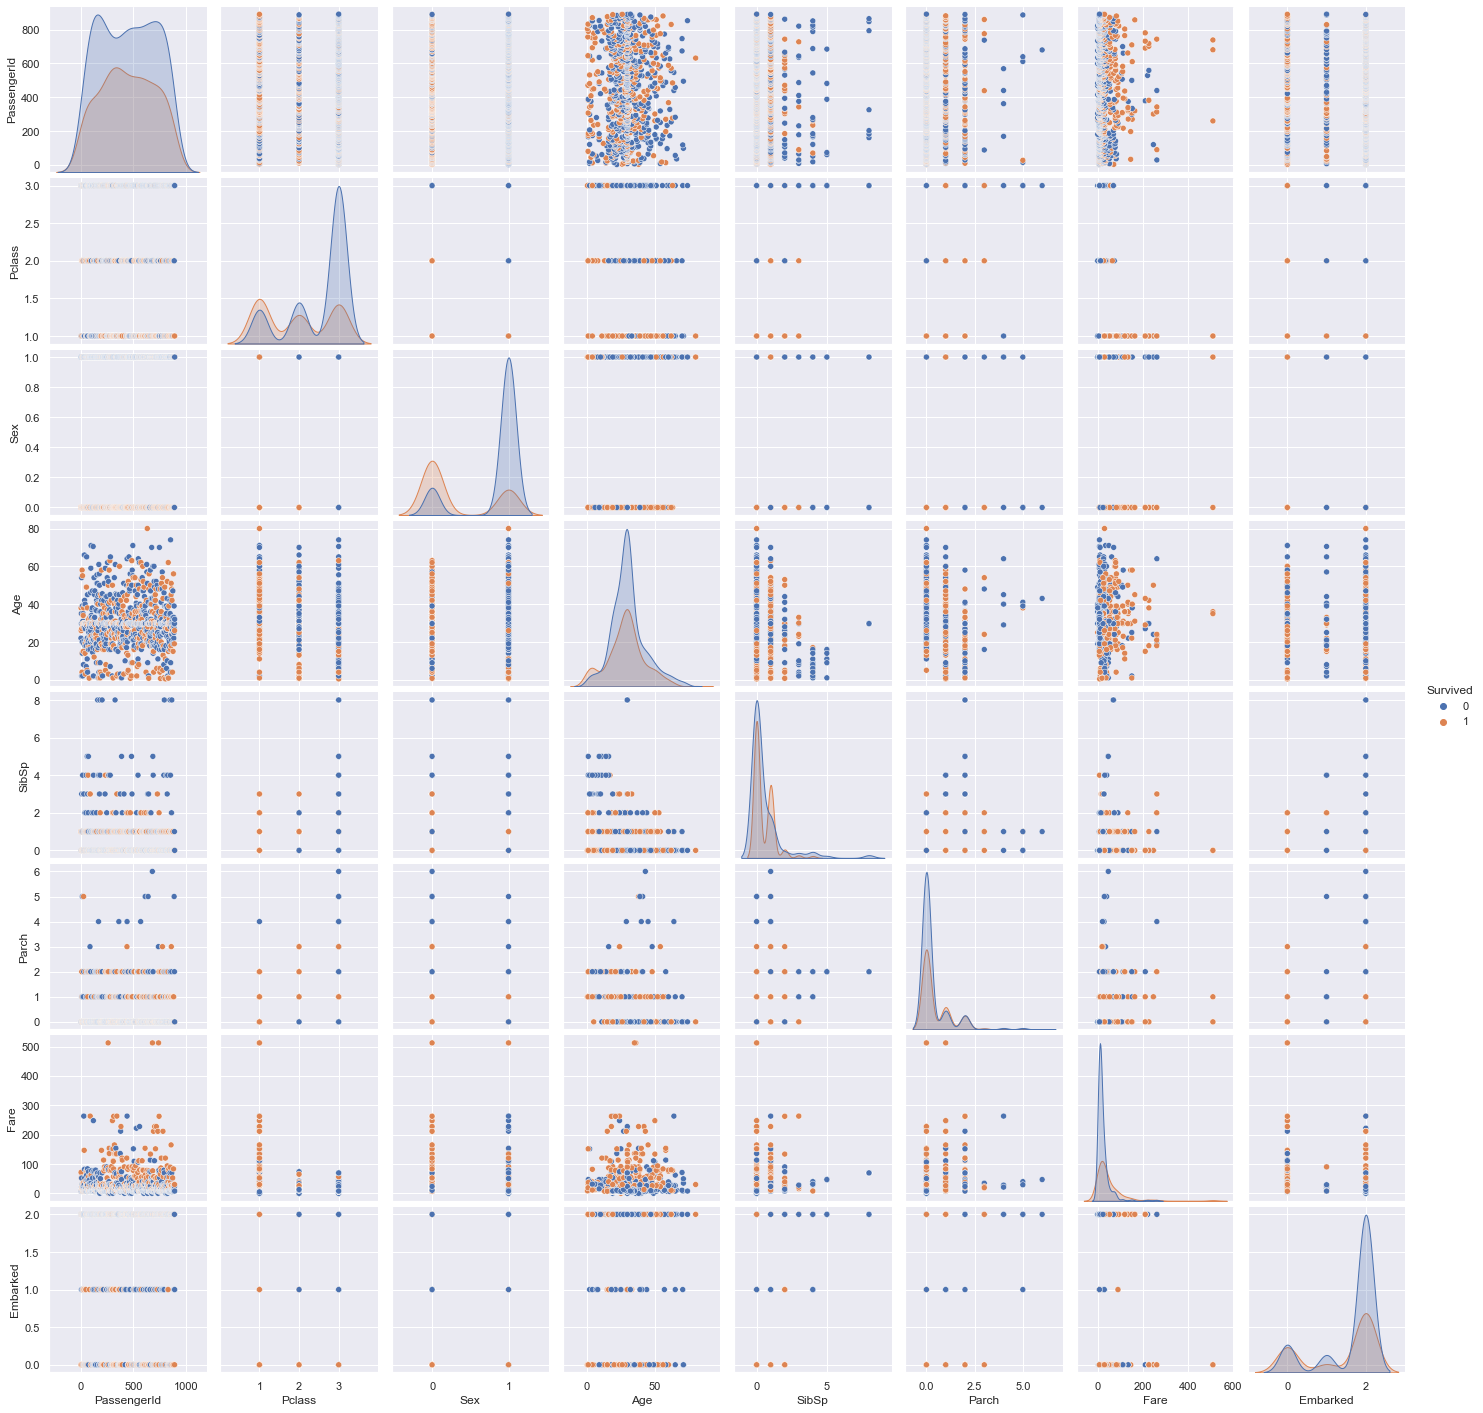

In [380]:
sns.pairplot(df_titanic,hue='Survived')

Its shows the whole dataset in one view and it seems the survived rate 

#### check the Outliers

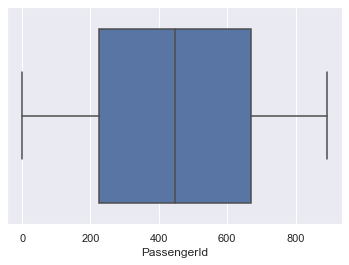

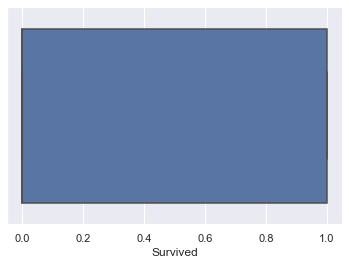

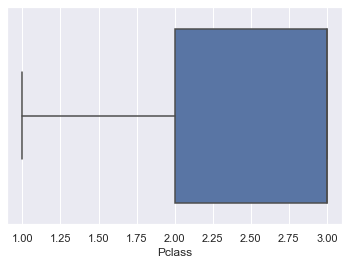

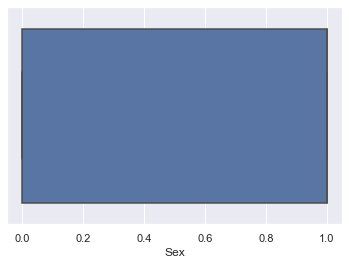

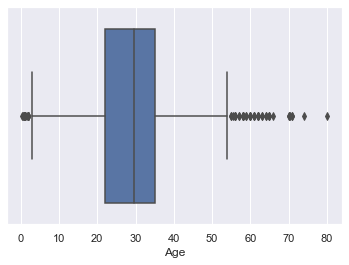

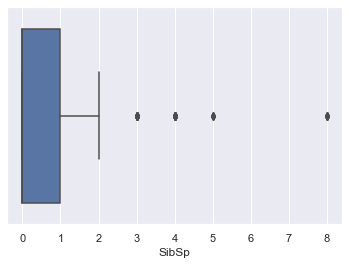

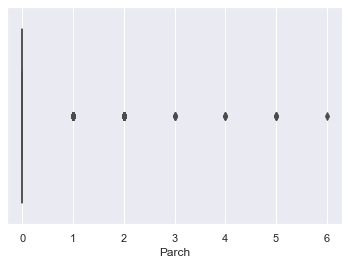

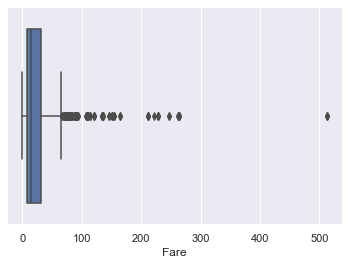

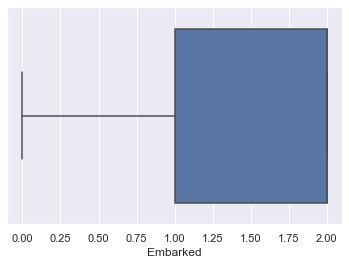

In [381]:
for i in df_titanic:
    sns.boxplot(df_titanic[i])
    plt.show()

#### Age Column have outliers
#### SibSp have few ouliers // in catagorical form so cannot apply skewness in this columns
#### Parch have also many outlies //// in catagorical form so cannot apply skewness in this columns
#### fare columns found outliers 

In [382]:
df_titanic.skew()

PassengerId    0.000000
Survived       0.478523
Pclass        -0.630548
Sex           -0.618921
Age            0.434488
SibSp          3.695352
Parch          2.749117
Fare           4.787317
Embarked      -1.264823
dtype: float64

#### Handle the Outliers

Try IQR method to see the outliers

In [383]:
quantile1=df_titanic.quantile(0.25)

In [384]:
quantile3=df_titanic.quantile(0.75)

In [385]:
iqr_val=quantile3-quantile1
iqr_val

PassengerId    445.0000
Survived         1.0000
Pclass           1.0000
Sex              1.0000
Age             13.0000
SibSp            1.0000
Parch            0.0000
Fare            23.0896
Embarked         1.0000
dtype: float64

In [386]:
lower_limit=quantile1-(1.5*iqr_val)
upper_limit=quantile3+(1.5*iqr_val)

In [387]:
quant1 =df_titanic['Age'].quantile(.99)

<AxesSubplot:xlabel='Age', ylabel='Density'>

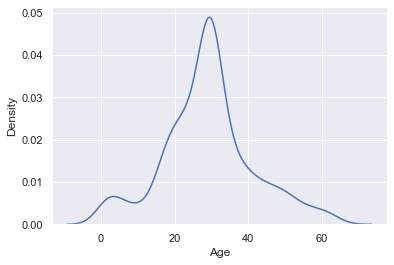

In [388]:
new = df_titanic['Age'][df_titanic['Age'] < quant1]
sns.kdeplot(new)

<AxesSubplot:xlabel='Age'>

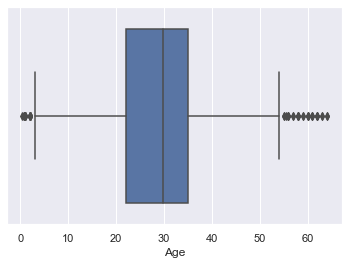

In [389]:
new = df_titanic['Age'][df_titanic['Age'] < quant1]
sns.boxplot(new)

In [390]:
#### Most of Outliers from Age column has been droped

Only one outliers are in SibSp columns and other are droped

<AxesSubplot:xlabel='Fare'>

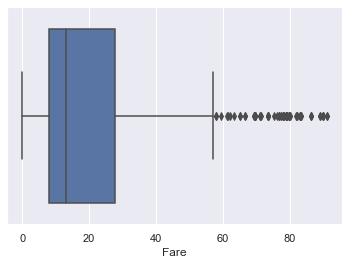

In [391]:
quant4 = df_titanic['Fare'].quantile(.94)
new3=df_titanic['Fare'][df_titanic['Fare']<quant4]
sns.boxplot(new3)

In [392]:
df=df_titanic[df_titanic['Age']<quant1]
df=df_titanic[df_titanic['Fare']<quant4]
print(df.shape)

(836, 9)


In [393]:
df_titanic.shape

(891, 9)

In [394]:
df.shape

(836, 9)

#### Percentage Of Data to be loss

In [395]:
DataLossPercent = (891-836)/891*100

In [396]:
DataLossPercent

6.172839506172839

 #### % 6 percent of data is Losing from removing outliers

In [397]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,1,22.000000,1,0,7.2500,2
1,2,1,1,0,38.000000,1,0,71.2833,0
2,3,1,3,0,26.000000,0,0,7.9250,2
3,4,1,1,0,35.000000,1,0,53.1000,2
4,5,0,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...,...
886,887,0,2,1,27.000000,0,0,13.0000,2
887,888,1,1,0,19.000000,0,0,30.0000,2
888,889,0,3,0,29.699118,1,2,23.4500,2
889,890,1,1,1,26.000000,0,0,30.0000,0


#### DIvide Deependent and Independent Variable

In [398]:
x=df.drop(['Survived'],axis=True)
y=df['Survived']

In [399]:
x

,PassengerId,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,3,1,22.000000,1,0,7.2500,2
1,2,1,0,38.000000,1,0,71.2833,0
2,3,3,0,26.000000,0,0,7.9250,2
3,4,1,0,35.000000,1,0,53.1000,2
4,5,3,1,35.000000,0,0,8.0500,2
...,...,...,...,...,...,...,...,...
886,887,2,1,27.000000,0,0,13.0000,2
887,888,1,0,19.000000,0,0,30.0000,2
888,889,3,0,29.699118,1,2,23.4500,2
889,890,1,1,26.000000,0,0,30.0000,0


In [400]:
y

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 836, dtype: int64

#### Model Training

In [424]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

In [407]:
from sklearn.linear_model import LogisticRegression
maxAcc=0
maxRs=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=i)
    LG=LogisticRegression()
    LG.fit(x_train,y_train)
    pred=LG.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAcc:
        maxAcc=accu
        maxRs=1
print("Best accuracy -",maxAcc,'Best Random state = ',maxRs)
#Best accuracy - 0.8467153284671532 Best Random state =  1

Best accuracy - 0.8405797101449275 Best Random state =  1


In [418]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=1)

In [422]:
classification_score=classification_report(y_test,pred)
confusion_matrix = confusion_matrix(y_test,pred)
print('Accuracy Score :', maxAcc)
print('Classification Score :', classification_score)
print('confusion Matrix :', confusion_matrix)

Accuracy Score : 0.8405797101449275
Classification Score :               precision    recall  f1-score   support

           0       0.84      0.83      0.84       183
           1       0.68      0.70      0.69        93

    accuracy                           0.79       276
   macro avg       0.76      0.76      0.76       276
weighted avg       0.79      0.79      0.79       276

confusion Matrix : [[152  31]
 [ 28  65]]


#### AUC ROC 

In [426]:
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt

from sklearn.metrics import roc_auc_score

In [429]:
y_pred_prob=LG.predict_proba(x_test)[:,1]

In [430]:
y_pred_prob

array([0.12356136, 0.51192187, 0.12008881, 0.46648842, 0.05780416,
       0.98173747, 0.07766516, 0.0676553 , 0.41988417, 0.077065  ,
       0.096854  , 0.59692612, 0.09414799, 0.30698004, 0.96081466,
       0.11419192, 0.58790968, 0.37538697, 0.13020601, 0.13680008,
       0.12306291, 0.76120915, 0.6181043 , 0.11630003, 0.14265353,
       0.11739006, 0.97814515, 0.73966041, 0.15168522, 0.42241975,
       0.10642512, 0.40473417, 0.75113904, 0.12847519, 0.64677274,
       0.65453661, 0.10045615, 0.07058359, 0.08500111, 0.63812542,
       0.06860146, 0.12593541, 0.09717129, 0.08974959, 0.08891714,
       0.56688816, 0.09637028, 0.1089681 , 0.05421938, 0.19462154,
       0.06484589, 0.5571916 , 0.13639898, 0.23600623, 0.39801454,
       0.19481383, 0.17858018, 0.59749104, 0.13559814, 0.14430904,
       0.14624383, 0.29014381, 0.56753735, 0.60134404, 0.87758629,
       0.11337228, 0.59199546, 0.52413349, 0.16385857, 0.10297099,
       0.29051773, 0.14379885, 0.05069031, 0.03582797, 0.95209

In [432]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr
thresholds

array([1.98529593, 0.98529593, 0.84757459, 0.83109148, 0.75113904,
       0.74386983, 0.74118848, 0.73966041, 0.7155362 , 0.71469882,
       0.71104015, 0.70910061, 0.70255655, 0.68878504, 0.68092262,
       0.67436972, 0.661479  , 0.65453661, 0.65291624, 0.64677274,
       0.64463654, 0.64036551, 0.63586198, 0.63514925, 0.6181043 ,
       0.61807406, 0.60154531, 0.59749104, 0.59622862, 0.5951761 ,
       0.59199546, 0.58914795, 0.588851  , 0.58749323, 0.58732071,
       0.57823489, 0.56770504, 0.5571916 , 0.55110085, 0.54623028,
       0.52746948, 0.50626472, 0.5026743 , 0.48214154, 0.46811139,
       0.42241975, 0.41988417, 0.37945837, 0.37358474, 0.29980466,
       0.29051773, 0.29014381, 0.24040034, 0.23866   , 0.23761822,
       0.22424004, 0.21520027, 0.20703716, 0.19316841, 0.18745287,
       0.18448112, 0.17813717, 0.17118218, 0.16385857, 0.16228849,
       0.16049717, 0.16023695, 0.15598576, 0.15490558, 0.15168522,
       0.15152151, 0.13688029, 0.13681271, 0.1355751 , 0.13219

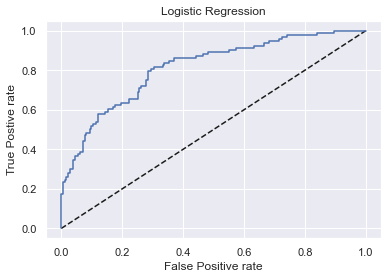

In [436]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Postive rate')
plt.title('Logistic Regression')
plt.show()

In [425]:
DTC=DecisionTreeClassifier()
DTC.fit(x_train,y_train)
pred=DTC.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)
confusion_matrix = confusion_matrix(y_test,pred)
print('Accuracy Score :', accu)
print('Classification Score :', classification_score)
print('confusion Matrix :', confusion_matrix)

Accuracy Score : 0.7862318840579711
Classification Score :               precision    recall  f1-score   support

           0       0.85      0.82      0.84       183
           1       0.67      0.72      0.69        93

    accuracy                           0.79       276
   macro avg       0.76      0.77      0.76       276
weighted avg       0.79      0.79      0.79       276

confusion Matrix : [[150  33]
 [ 26  67]]


#### AUC ROC

In [437]:
y_pred_prob=DTC.predict_proba(x_test)[:,1]

In [438]:
y_pred_prob

array([0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 0., 0., 1., 1., 0., 0.,
       0., 1., 0., 1., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1., 1., 0., 0.,
       1., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 1., 0.,
       0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0., 1.,
       0., 0., 0., 0., 0., 0., 1., 1., 1., 0., 0., 0., 1., 1., 0., 1., 1.,
       1., 0., 1., 0., 0., 1., 1., 0., 1., 0., 0., 1., 1., 0., 0., 1., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 1., 1., 0.,
       0., 0., 0., 1., 0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1.,
       0., 1., 0., 1., 0., 0., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 1., 1., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 1., 0., 0., 0., 1., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       1., 1., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.,
       1., 0., 1., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 0., 1., 0.,
       1., 0., 1., 1., 1.

In [439]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr
thresholds

array([2., 1., 0.])

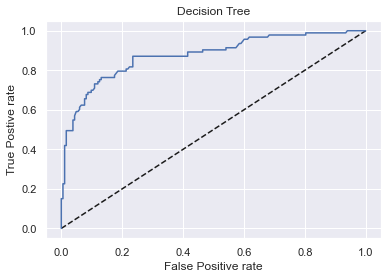

In [447]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Postive rate')
plt.title('Decision Tree')
plt.show()

In [441]:
RF=RandomForestClassifier(n_estimators=1000,random_state=1)
RF.fit(x_train,y_train)
pred=RF.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)

print('Accuracy Score :', accu)
print('Classification Score :', classification_score)

Accuracy Score : 0.8369565217391305
Classification Score :               precision    recall  f1-score   support

           0       0.85      0.91      0.88       183
           1       0.80      0.69      0.74        93

    accuracy                           0.84       276
   macro avg       0.83      0.80      0.81       276
weighted avg       0.83      0.84      0.83       276



#### Auc Roc

In [442]:
y_pred_prob=RF.predict_proba(x_test)[:,1]

In [443]:
y_pred_prob

array([0.059, 0.262, 0.003, 0.092, 0.394, 0.988, 0.024, 0.262, 0.627,
       0.019, 0.075, 0.47 , 0.062, 0.431, 0.975, 0.329, 0.384, 0.449,
       0.515, 0.072, 0.141, 0.922, 0.592, 0.074, 0.234, 0.01 , 0.989,
       0.662, 0.051, 0.128, 0.385, 0.395, 0.325, 0.091, 0.665, 0.347,
       0.075, 0.068, 0.017, 0.212, 0.008, 0.053, 0.304, 0.247, 0.024,
       0.271, 0.008, 0.017, 0.014, 0.379, 0.093, 0.588, 0.263, 0.299,
       0.271, 0.683, 0.073, 0.338, 0.039, 0.273, 0.102, 0.36 , 0.355,
       0.404, 0.96 , 0.153, 0.605, 0.657, 0.038, 0.307, 0.182, 0.058,
       0.276, 0.174, 0.816, 0.913, 0.56 , 0.249, 0.018, 0.592, 0.379,
       0.178, 0.384, 0.813, 0.712, 0.067, 0.18 , 0.75 , 0.07 , 0.032,
       0.909, 0.95 , 0.025, 0.465, 0.089, 0.355, 0.894, 0.699, 0.104,
       0.105, 0.273, 0.39 , 0.015, 0.294, 0.242, 0.929, 0.034, 0.018,
       0.21 , 0.631, 0.363, 0.038, 0.486, 0.868, 0.971, 0.54 , 0.833,
       0.928, 0.176, 0.147, 0.204, 0.044, 0.633, 0.191, 0.125, 0.162,
       0.81 , 0.299,

In [444]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr
thresholds

array([1.989, 0.989, 0.971, 0.96 , 0.929, 0.928, 0.922, 0.913, 0.909,
       0.897, 0.741, 0.737, 0.693, 0.683, 0.669, 0.657, 0.624, 0.611,
       0.605, 0.6  , 0.598, 0.595, 0.593, 0.592, 0.588, 0.56 , 0.558,
       0.524, 0.518, 0.515, 0.49 , 0.486, 0.471, 0.47 , 0.458, 0.45 ,
       0.449, 0.444, 0.435, 0.431, 0.42 , 0.395, 0.394, 0.39 , 0.385,
       0.379, 0.36 , 0.355, 0.349, 0.347, 0.338, 0.33 , 0.329, 0.314,
       0.304, 0.299, 0.275, 0.273, 0.272, 0.271, 0.263, 0.262, 0.259,
       0.249, 0.243, 0.242, 0.215, 0.211, 0.21 , 0.202, 0.188, 0.182,
       0.141, 0.136, 0.124, 0.111, 0.11 , 0.104, 0.102, 0.101, 0.093,
       0.089, 0.088, 0.076, 0.075, 0.074, 0.073, 0.072, 0.07 , 0.05 ,
       0.049, 0.048, 0.044, 0.041, 0.039, 0.038, 0.035, 0.034, 0.031,
       0.03 , 0.025, 0.024, 0.019, 0.018, 0.017, 0.01 , 0.008, 0.003])

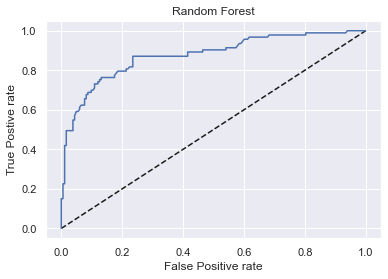

In [446]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Postive rate')
plt.title('Random Forest')
plt.show()

In [453]:
AD=AdaBoostClassifier(n_estimators=100,random_state=1)
AD.fit(x_train,y_train)
pred=AD.predict(x_test)
accu=accuracy_score(y_test,pred)
classification_score=classification_report(y_test,pred)

print('Accuracy Score :', accu)
print('Classification Score :', classification_score)

Accuracy Score : 0.7789855072463768
Classification Score :               precision    recall  f1-score   support

           0       0.82      0.86      0.84       183
           1       0.69      0.62      0.66        93

    accuracy                           0.78       276
   macro avg       0.75      0.74      0.75       276
weighted avg       0.77      0.78      0.78       276



In [454]:
y_pred_prob=RF.predict_proba(x_test)[:,1]

In [455]:
y_pred_prob

array([0.059, 0.262, 0.003, 0.092, 0.394, 0.988, 0.024, 0.262, 0.627,
       0.019, 0.075, 0.47 , 0.062, 0.431, 0.975, 0.329, 0.384, 0.449,
       0.515, 0.072, 0.141, 0.922, 0.592, 0.074, 0.234, 0.01 , 0.989,
       0.662, 0.051, 0.128, 0.385, 0.395, 0.325, 0.091, 0.665, 0.347,
       0.075, 0.068, 0.017, 0.212, 0.008, 0.053, 0.304, 0.247, 0.024,
       0.271, 0.008, 0.017, 0.014, 0.379, 0.093, 0.588, 0.263, 0.299,
       0.271, 0.683, 0.073, 0.338, 0.039, 0.273, 0.102, 0.36 , 0.355,
       0.404, 0.96 , 0.153, 0.605, 0.657, 0.038, 0.307, 0.182, 0.058,
       0.276, 0.174, 0.816, 0.913, 0.56 , 0.249, 0.018, 0.592, 0.379,
       0.178, 0.384, 0.813, 0.712, 0.067, 0.18 , 0.75 , 0.07 , 0.032,
       0.909, 0.95 , 0.025, 0.465, 0.089, 0.355, 0.894, 0.699, 0.104,
       0.105, 0.273, 0.39 , 0.015, 0.294, 0.242, 0.929, 0.034, 0.018,
       0.21 , 0.631, 0.363, 0.038, 0.486, 0.868, 0.971, 0.54 , 0.833,
       0.928, 0.176, 0.147, 0.204, 0.044, 0.633, 0.191, 0.125, 0.162,
       0.81 , 0.299,

In [456]:
fpr,tpr,thresholds=roc_curve(y_test,y_pred_prob)
fpr
tpr
thresholds

array([1.989, 0.989, 0.971, 0.96 , 0.929, 0.928, 0.922, 0.913, 0.909,
       0.897, 0.741, 0.737, 0.693, 0.683, 0.669, 0.657, 0.624, 0.611,
       0.605, 0.6  , 0.598, 0.595, 0.593, 0.592, 0.588, 0.56 , 0.558,
       0.524, 0.518, 0.515, 0.49 , 0.486, 0.471, 0.47 , 0.458, 0.45 ,
       0.449, 0.444, 0.435, 0.431, 0.42 , 0.395, 0.394, 0.39 , 0.385,
       0.379, 0.36 , 0.355, 0.349, 0.347, 0.338, 0.33 , 0.329, 0.314,
       0.304, 0.299, 0.275, 0.273, 0.272, 0.271, 0.263, 0.262, 0.259,
       0.249, 0.243, 0.242, 0.215, 0.211, 0.21 , 0.202, 0.188, 0.182,
       0.141, 0.136, 0.124, 0.111, 0.11 , 0.104, 0.102, 0.101, 0.093,
       0.089, 0.088, 0.076, 0.075, 0.074, 0.073, 0.072, 0.07 , 0.05 ,
       0.049, 0.048, 0.044, 0.041, 0.039, 0.038, 0.035, 0.034, 0.031,
       0.03 , 0.025, 0.024, 0.019, 0.018, 0.017, 0.01 , 0.008, 0.003])

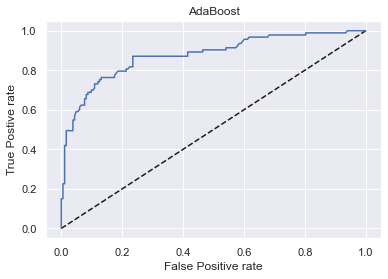

In [457]:
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='Logistic Regression')
plt.xlabel('False Positive rate')
plt.ylabel('True Postive rate')
plt.title('AdaBoost')
plt.show()

#### Cross Validation

In [458]:
from sklearn.model_selection import cross_val_score

In [459]:
print('Logistic Regression: ',cross_val_score(LG,x,y,cv=5).mean())

Logistic Regression:  0.7822925577416595


In [460]:
print('Decission Tree :',cross_val_score(DTC,x,y,cv=5).mean())

Decission Tree : 0.7728685486170516


In [463]:
print('Random Forest :',cross_val_score(RF,x,y,cv=5).mean())

Random Forest : 0.8110493299116053


In [464]:
print('Adaboost Tree  :',cross_val_score(AD,x,y,cv=5).mean())

Adaboost Tree  : 0.7393570002851441


#### from Above Trainind Process DTC is Best Model Let Go for Hyper Tunning to tune the accuracy

In [467]:
from sklearn.model_selection import GridSearchCV

In [468]:
parameter ={'max_depth':np.arange(2,10),
           'criterion':['gini', 'entropy'],
           'splitter':['best','random']}

In [469]:
GCV=GridSearchCV(DecisionTreeClassifier(),parameter,cv=5)
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([2, 3, 4, 5, 6, 7, 8, 9]),
                         'splitter': ['best', 'random']})

In [470]:
GCV.best_params_

{'criterion': 'gini', 'max_depth': 5, 'splitter': 'random'}

In [471]:
Final_model=DecisionTreeClassifier(criterion='gini',max_depth=8,splitter='best')
Final_model.fit(x_train,y_train)
pred=Final_model.predict(x_test)
accu=accuracy_score(y_test,pred)
print(accu*100)

78.62318840579711


No Fiiting is there to find the accuracy

#### Shaving The Model

In [472]:
import joblib
joblib.dump(Final_model,'Final_model.pkl')

['Final_model.pkl']